# Report 1
- Candidate: Phuc Thanh Nguyen
- Candidate number: 277269

## Setting up

First, we import the data and write the `time_it` function to use for time-complexity analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data
df = pd.read_csv("data2023.csv",index_col=0)
df.head()

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19,doc20
A,0,6,5,7,9,13,16,12,14,22,17,27,32,17,28,28,47,41,35,32
A-tu,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
A.,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
ABC,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aah,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21155 entries, A to être
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   doc1    21155 non-null  int64
 1   doc2    21155 non-null  int64
 2   doc3    21155 non-null  int64
 3   doc4    21155 non-null  int64
 4   doc5    21155 non-null  int64
 5   doc6    21155 non-null  int64
 6   doc7    21155 non-null  int64
 7   doc8    21155 non-null  int64
 8   doc9    21155 non-null  int64
 9   doc10   21155 non-null  int64
 10  doc11   21155 non-null  int64
 11  doc12   21155 non-null  int64
 12  doc13   21155 non-null  int64
 13  doc14   21155 non-null  int64
 14  doc15   21155 non-null  int64
 15  doc16   21155 non-null  int64
 16  doc17   21155 non-null  int64
 17  doc18   21155 non-null  int64
 18  doc19   21155 non-null  int64
 19  doc20   21155 non-null  int64
dtypes: int64(20)
memory usage: 3.4+ MB


In [4]:
import time

# function for time complexity analysis
def timeit(somefunc,*args,repeats=50,**kwargs):
    times=[]
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats -= 1
    mean=np.mean(times)
    stdev=np.std(times)
    return (mean,stdev,ans)

## Question 1

The data is provided in the format of DataFrame - a Matrix with rows as shingles, columns as documents, and values as the number of times the shingles occur in the documents.

Therefore, when extracted, each document (each column) is represented by an array of numbers.

Here is the function to compute the Cosine Similarity between two documents.

In [5]:
def cosine(doc1,doc2):
    dot_prod = 0
    doc1_prod = 0
    doc2_prod = 0
    for i in range(len(doc1)):
        dot_prod += doc1[i]*doc2[i]
        doc1_prod += doc1[i]**2
        doc2_prod += doc2[i]**2
    return dot_prod / (doc1_prod*doc2_prod)**0.5

Theoretically, we go through every shingle and calculate the dot product of this shingle between two documents. We need one `for` loop here, so the time complexity is $O(n)$, where $n$ is the number of shingles in the corpus.

Now, we will conduct an empirical test by measuring the similarity of two documents multiple times with different numbers of shingles. Let's say we pick `doc5` and `doc15`.

In [6]:
xs1 = []
ys1 = []
zs1 = []

for n in range(100,len(df),100):
    df_test = df.iloc[:n] # select first n rows (n shingles)
    doc1 = df_test['doc5'].values
    doc2 = df_test['doc15'].values
    
    xs1.append(n)
    
    mean,stdev,ans = timeit(cosine,doc1,doc2)
    ys1.append(mean)
    zs1.append(ans)

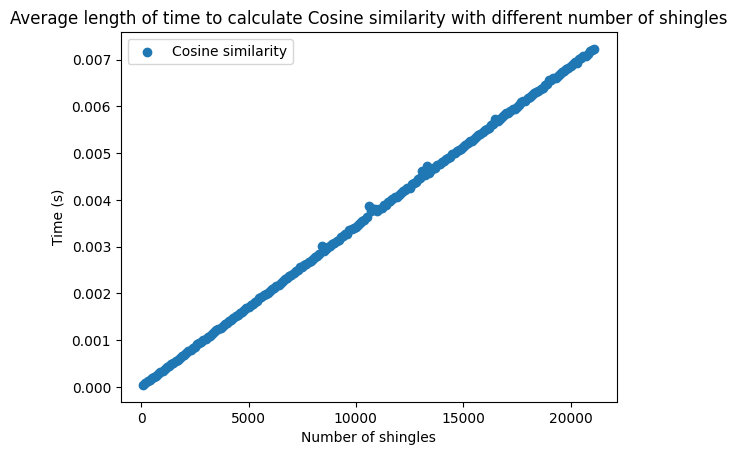

In [7]:
import matplotlib.pyplot as plt

plt.scatter(xs1, ys1, label='Cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of shingles')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate Cosine similarity with different number of shingles')
plt.show()

From the empirical analysis, we saw that the time complexity of Cosine Similarity is linear with the number of shingles, so it is $O(n)$.

Since the plot is linear, the function is $y=cx+b$. We can estimate the slope and intercept of the formula:

In [8]:
from scipy.stats import linregress

res1 = linregress(xs1, ys1)
res1

LinregressResult(slope=3.4303580174583956e-07, intercept=6.146445174271854e-06, rvalue=0.9999176412455061, pvalue=0.0, stderr=3.0455309384930117e-10, intercept_stderr=3.723278346969465e-06)

The key constant in the formula is the estimated slope: $c \approx 3.43 \times 10^{-7}$.

We can also make use the dot product method from Numpy to compute the Cosine Similarity.

Let's see the result from the implementation of the dot product in Numpy.

In [9]:
def cosine_np(doc1,doc2):
    return np.dot(doc1,doc2) / (np.dot(doc1,doc1)*np.dot(doc2,doc2))**0.5

In [10]:
xs1_np = []
ys1_np = []
zs1_np = []

for n in range(100,len(df),100):
    df_test = df.iloc[:n] # select first n rows (n shingles)
    doc1 = df_test['doc5'].values
    doc2 = df_test['doc15'].values
    
    xs1_np.append(n)
    
    mean,stdev,ans = timeit(cosine_np,doc1,doc2)
    ys1_np.append(mean)
    zs1_np.append(ans)

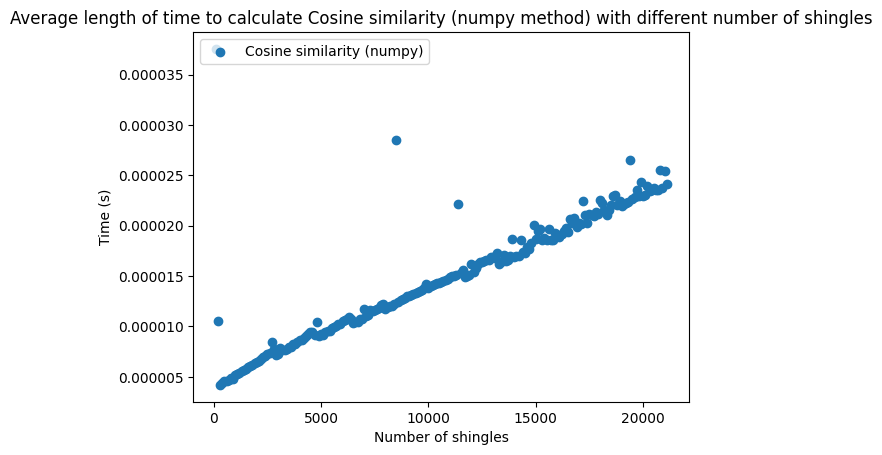

In [11]:
plt.scatter(xs1_np, ys1_np, label='Cosine similarity (numpy)')
plt.legend(loc='upper left')
plt.xlabel('Number of shingles')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate Cosine similarity (numpy method) with different number of shingles')
plt.ticklabel_format(style="plain")
plt.show()

In [12]:
res1_np = linregress(xs1_np, ys1_np)
res1_np

LinregressResult(slope=8.841340971675883e-10, intercept=5.426650282976669e-06, rvalue=0.9000362575957455, pvalue=2.5163175257569545e-77, stderr=2.961332610151522e-11, intercept_stderr=3.620342662159112e-07)

We can see that the runtime of the Numpy dot product method is still linear, so it is $O(n)$.

But compared to the first Cosine Similarity measurement, it is much faster (the key constant is significantly smaller) 
- $c \approx 8.841 \times 10^{-10}$ is over 100 times smaller.

## Question 2

For the Jaccard Similarity, we've got the function for standard Jaccard measurement applied to sets as below.

In [13]:
def jaccard_set(doc1,doc2):
    inter = 0
    union = 0
    for i in range(len(doc1)):
        if doc1[i] != 0 and doc2[i] != 0:
            inter += 1
        if doc1[i] != 0 or doc2[i] != 0:
            union += 1
    return inter/union

With data in the format of the provided data matrix, the inputs of our function are arrays. Same with `cosine` function in question 1, we can go through the arrays to compare shingles with one `for` loop. So, the time complexity of Jaccard Similarity is $O(n)$. 

Let's carry out an experiment.

In [14]:
xs2_set = []
ys2_set = []
zs2_set = []

for n in range(100,len(df),100):
    df_test = df.iloc[:n] # select first n rows (n shingles)
    doc1 = df_test['doc5'].values
    doc2 = df_test['doc15'].values
    
    xs2_set.append(n)
    
    mean,stdev,ans = timeit(jaccard_set,doc1,doc2)
    ys2_set.append(mean)
    zs2_set.append(ans)

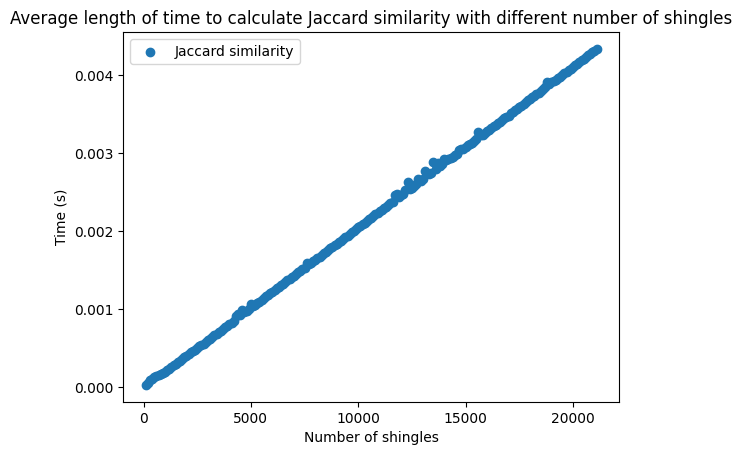

In [15]:
plt.scatter(xs2_set, ys2_set, label='Jaccard similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of shingles')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate Jaccard similarity with different number of shingles')
plt.show()

It is clear that the time complexity is $O(n)$ with function: $y=cx+b$
- $y$: run-time
- $x$: number of shingles
- $c$: constant

In [16]:
res2_set = linregress(xs2_set, ys2_set)
res2_set

LinregressResult(slope=2.056689033416199e-07, intercept=-4.821745705265237e-06, rvalue=0.9998901351356356, pvalue=0.0, stderr=2.1089956629605948e-10, intercept_stderr=2.5783280630993047e-06)

The key constant is: $c \approx 2.057 \times 10^{-7}$.

$\rarr$ The constant of Jaccard Similarity is less than that of Cosine Similarity, so the Jaccard measurement is a bit faster, although both have the time complexity $O(n)$.

We can also write a function for the Jaccard Similarity applied to bags of words and analyse it.

In [17]:
def jaccard_bag(doc1,doc2):
    inter = 0
    union = 0
    for i in range(len(doc1)):
        if doc1[i] != 0 or doc2[i] != 0:
            inter += min(doc1[i],doc2[i])
            union = doc1[i] + doc2[i]
    return inter/union

In [18]:
xs2_bag = []
ys2_bag = []
zs2_bag = []

for n in range(100,len(df),100):
    df_test = df.iloc[:n] # select first n rows (n shingles)
    doc1 = df_test['doc5'].values
    doc2 = df_test['doc15'].values
    
    xs2_bag.append(n)
    
    mean,stdev,ans = timeit(jaccard_bag,doc1,doc2)
    ys2_bag.append(mean)
    zs2_bag.append(ans)

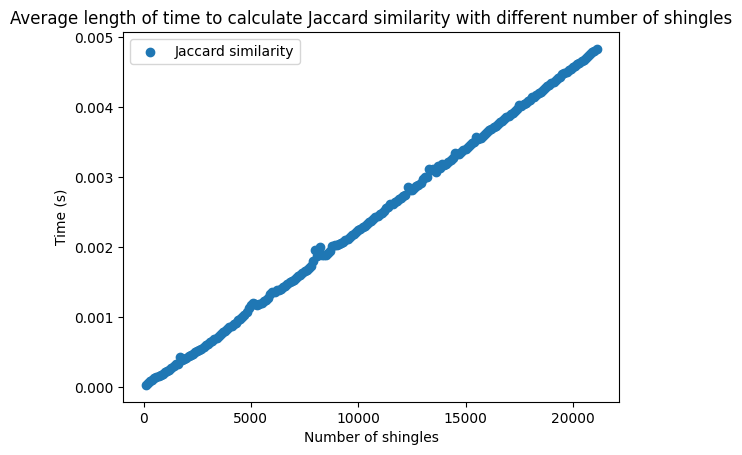

In [19]:
plt.scatter(xs2_bag, ys2_bag, label='Jaccard similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of shingles')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate Jaccard similarity with different number of shingles')
plt.show()

The time complexity from the result is also $O(n)$.

In [20]:
res2_bag = linregress(xs2_bag, ys2_bag)
res2_bag

LinregressResult(slope=2.305678992599687e-07, intercept=-4.166359794890561e-05, rvalue=0.9997897803272124, pvalue=0.0, stderr=3.270738752831388e-10, intercept_stderr=3.998603535131667e-06)

The key constant for Jaccard Similarity applied to bags is: $c \approx 2.306 \times 10^{-7}$

$\rarr$ It is slightly greater than the constant of Jaccard Similarity applied to sets but still smaller than that of Cosine Similarity.

## Question 3

To compute all-pairs similarities on a data matrix provided, we need to calculate the similarity of each pair. If $n$ is the number of documents, then we have:

$\begin{pmatrix}n\\2 \end{pmatrix} = \frac{n!}{2!\times (n-2)!} = \frac{n\times (n-1)}{2}$ combinations.

$\rarr$ With a fixed number of shingles, the time complexity in $O$-notation is $O(n^2)$, where $n$ is the number of documents.

Here, we get a function to apply the similarity measurement to all pairs of documents:

In [21]:
from itertools import combinations

def all_pairs_sim(df,measure=jaccard_set):
    all_pairs = list(combinations(df.columns,2))
    return [(col1,col2,measure(df[col1].values,df[col2].values)) for (col1,col2) in all_pairs] 

Now, we compute the all-pair Jaccard Similarity (applied to sets) with different numbers of documents.

In [22]:
xs3_jc = []
ys3_jc = []
zs3_jc = []

for n in range(2,len(df.columns)+1):
    df_test = df.iloc[:,:n] # select data that have n columns (n documents)
    
    xs3_jc.append(n)
    
    mean,stdev,ans = timeit(all_pairs_sim,df_test,jaccard_set,repeats=20)
    ys3_jc.append(mean)
    zs3_jc.append(ans)

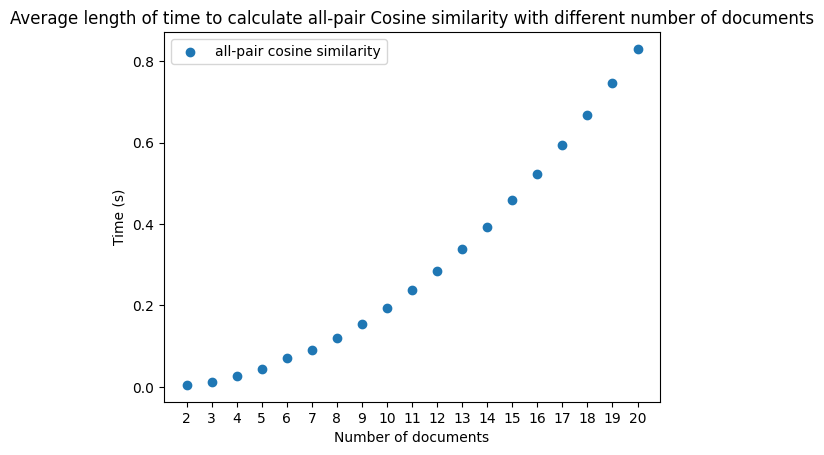

In [23]:
plt.scatter(xs3_jc, ys3_jc, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of documents')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of documents')
plt.xticks(xs3_jc)
plt.show()

It is clear that the plot has the shape of an exponential function $\rarr$ we can write it as: 

\begin{align}
y = c.x^{\alpha}
\end{align}
- $x$: number of documents
- $y$: all-pair similarity compute-time
- $c$: constant

To estimate the exponential and constant, we can take $\log$ from both sides and get a linear function:
\begin{align}
\log(y) = \log(c) + {\alpha}.\log(x)
\end{align}

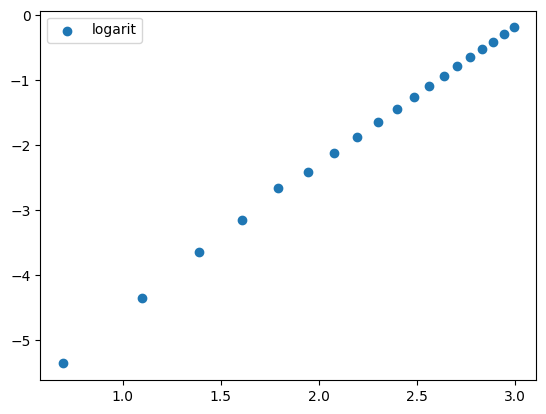

In [24]:
logxs3_jc = [np.log(x) for x in xs3_jc]
logys3_jc = [np.log(y) for y in ys3_jc]

plt.scatter(logxs3_jc, logys3_jc, label="logarit")
plt.legend(loc='best')
plt.show()

In [25]:
res3_jc = linregress(logxs3_jc, logys3_jc)
res3_jc

LinregressResult(slope=2.2075884642554717, intercept=-6.749299769671578, rvalue=0.999279036675287, pvalue=1.3498912812458078e-25, stderr=0.020342305448371487, intercept_stderr=0.04717087454883649)

The slope $\alpha$ is the estimated exponential, and in the result, it is slightly higher than 2: $\alpha \approx 2.208$

The intercept is $log(c) \rarr$ the key constant is: $c = 10^{\log(c)} \approx 10^{-6.749}$

Testing with the all-pair Cosine Similarity, we get a similar result as below.

In [26]:
xs3_cs = []
ys3_cs = []
zs3_cs = []

for n in range(2,len(df.columns)+1):
    df_test = df.iloc[:,:n] # select data that have n columns (n documents)
    
    xs3_cs.append(n)
    
    mean,stdev,ans = timeit(all_pairs_sim,df_test,cosine,repeats=20)
    ys3_cs.append(mean)
    zs3_cs.append(ans)

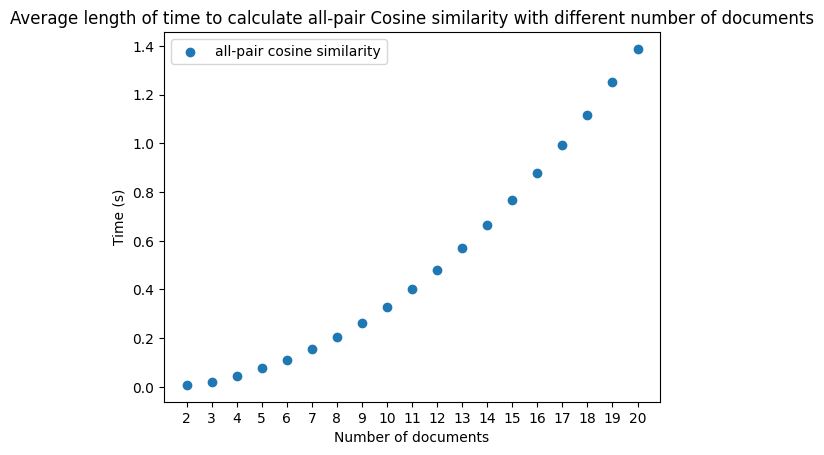

In [27]:
plt.scatter(xs3_cs, ys3_cs, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of documents')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of documents')
plt.xticks(xs3_cs)
plt.show()

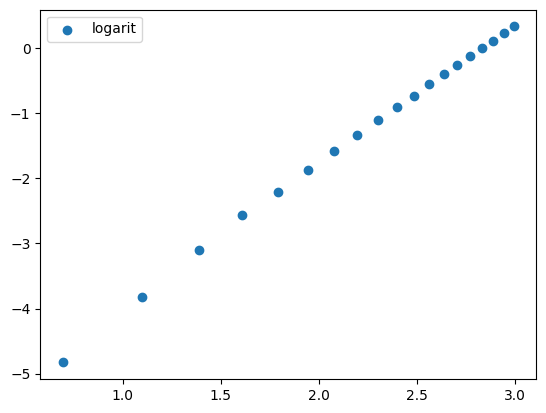

In [28]:
logxs3_cs = [np.log(x) for x in xs3_cs]
logys3_cs = [np.log(y) for y in ys3_cs]

plt.scatter(logxs3_cs, logys3_cs, label="logarit")
plt.legend(loc='best')
plt.show()

In [29]:
res3_cs = linregress(logxs3_cs, logys3_cs)
res3_cs

LinregressResult(slope=2.1948571815455034, intercept=-6.194135670757346, rvalue=0.9992691823914109, pvalue=1.5149523884559774e-25, stderr=0.020362891573726713, intercept_stderr=0.047218610806609364)

In this experiment, we have:
- The exponential: $\alpha \approx 2.195$
- The constant: $c = 10^{\log(c)} \approx 10^{-6.194}$

## Question 4

The device (MacBook 14-inch M1 pro) has 8 CPUs with 6 performance cores and 2 efficiency cores .

In [30]:
import os

os.cpu_count()

8

To run and test the parallel computing ability, I used a module named `defs.py`, which its copy has shown below.

In [ ]:
# This is a copy of a module named defs.py which is imported below

def jc_set_mapper(pair):
    col1, doc1 = pair[0]
    col2, doc2 = pair[1]
    inter = 0
    union = 0
    for i in range(len(doc1)):
        if doc1[i] != 0 and doc2[i] != 0:
            inter += 1
        if doc1[i] != 0 or doc2[i] != 0:
            union += 1
    sim = inter/union
    return (col1, col2, sim)

def jc_bag_mapper(pair):
    col1, doc1 = pair[0]
    col2, doc2 = pair[1]
    inter = 0
    union = 0
    for i in range(len(doc1)):
        if doc1[i] != 0 or doc2[i] != 0:
            inter += min(doc1[i],doc2[i])
            union = doc1[i] + doc2[i]
    sim = inter/union
    return (col1, col2, sim)

def cs_mapper(pair):
    col1, doc1 = pair[0]
    col2, doc2 = pair[1]
    dot_prod = 0
    doc1_prod = 0
    doc2_prod = 0
    for i in range(len(doc1)):
        dot_prod += doc1[i]*doc2[i]
        doc1_prod += doc1[i]**2
        doc2_prod += doc2[i]**2
    sim = dot_prod / (doc1_prod*doc2_prod)**0.5
    return (col1, col2, sim)


Here is a function designed to compute all-pair similarities for a DataFrame utilizing parallel processing. The concept is to calculate the similarity for each pair of documents concurrently, with each pair being processed by a separate task. The function has 3 arguments:
- `df`: the input DataFrame
- `mapper`: the similarity measurement used to map to all pairs of documents. The default is set to `jc_set_mapper`, which is defined in the `defs.py` module.
- `num_processes`: the number of processes to run tasks in parallel.

In [31]:
from multiprocessing import Pool
import defs # import the module

def all_pair_sim_parallel(df,mapper=defs.jc_set_mapper,num_processes=3):
    all_pairs = list(combinations(df.columns,2))
    pool = Pool(num_processes)
    results = pool.map(mapper,[((col1,df[col1].values),(col2,df[col2].values)) for (col1,col2) in all_pairs])
    pool.close()
    return results

In [32]:
# test the function with first 3 documents
result = all_pair_sim_parallel(df.iloc[:,:3],defs.jc_set_mapper)
display(df.iloc[:,:3])
print(result)

,doc1,doc2,doc3
A,0,6,5
A-tu,0,0,0
A.,0,0,0
ABC,0,0,0
Aah,0,0,0
...,...,...,...
états,0,0,0
étranger,0,0,0
évidence.,0,0,0
êtes,0,0,0


[('doc1', 'doc2', 0.28153745072273323), ('doc1', 'doc3', 0.25866757307953775), ('doc2', 'doc3', 0.2911032028469751)]


Now, we will test the run time of computing all-pair similarity with different numbers of concurrent processes.

Due to hardware limitations, I only used the first 10 documents instead of all 20 in this empirical analysis to reduce the run-time. We have a total of 45 pairs of documents.

In [33]:
df_test = df.iloc[:,:10] # select data that have first 10 columns (10 documents) 
print(f"Number of pairs of documents: {len(list(combinations(df_test.columns,2)))}")

xs4 = []
ys4 = []
zs4 = []

for n in range(1,17):
    xs4.append(n)
    
    mean,stdev,ans = timeit(all_pair_sim_parallel,df_test,defs.jc_set_mapper,n,repeats=20)
    ys4.append(mean)
    zs4.append(ans)

Number of pairs of documents: 45


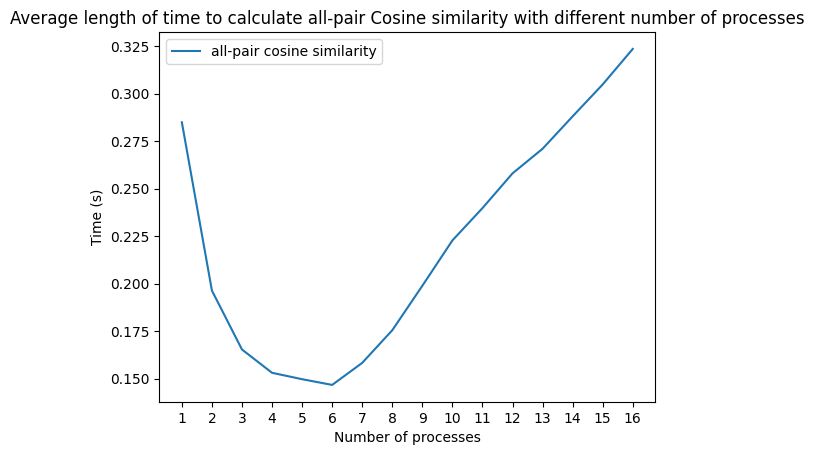

In [34]:
plt.plot(xs4, ys4, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of processes')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of processes')
plt.xticks(xs4)
plt.show()

As observed, the runtime decreases as the number of processes increases up to 6, which corresponds to the number of performance cores on the device. Beyond this point, the runtime starts to increase.

$\rarr$ The optimal efficiency is achieved when the device runs with 6 processes, matching the number of efficient CPU cores on the device.

We have the same pattern when computing all-pair Cosine Similarity in parallel.

In [35]:
df_test = df.iloc[:,:10] # select data that have first 10 columns (10 documents) 
print(f"Number of pairs of documents: {len(list(combinations(df_test.columns,2)))}")

xs4_2 = []
ys4_2 = []
zs4_2 = []

for n in range(1,17):
    xs4_2.append(n)
    
    mean,stdev,ans = timeit(all_pair_sim_parallel,df_test,defs.cs_mapper,n,repeats=20)
    ys4_2.append(mean)
    zs4_2.append(ans)

Number of pairs of documents: 45


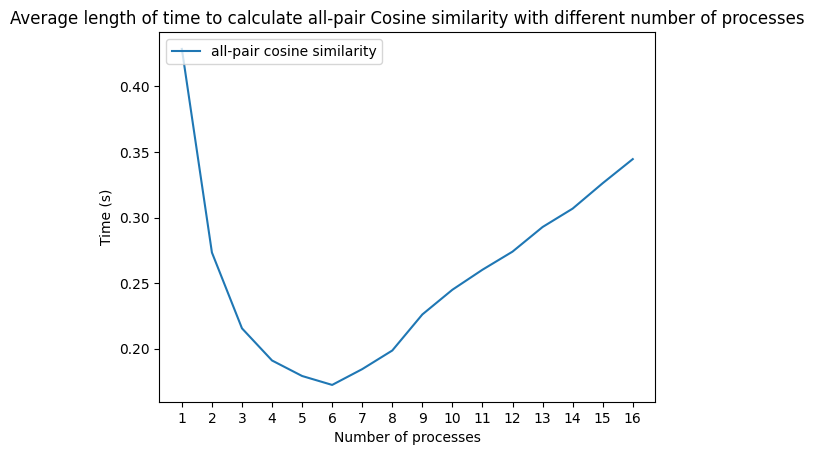

In [36]:
plt.plot(xs4_2, ys4_2, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of processes')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of processes')
plt.xticks(xs4)
plt.show()

## Question 5

We rewrite the all-pair Cosine Similarity computation with the matrix multiplication approach.

In this approach, from the data matrix $A$, we can calculate the similarity-matrix by flow 2 steps:
1. Calculate the matrix multiplication: $A' = A^T \times A$.
    - Because the rows in $A^T$ are columns in $A$ and are representative of documents $\rarr \vec{A^T_i}, \vec{A_j} = \vec{doc1}, \vec{doc2}$
    - Each element of $A'$ is the dot product of a row in $A^T$ and a column in $A$ $\rarr$ a dot product between 2 documents $\rarr$ $A'_{ij} = \vec{doc1} \cdot \vec{doc2}$
2. For each element of the matrix $A'$, divide it by the length of its corresponding row vector in $A^T$ and column vector in $A$. The resulting matrix $S$ is the similarity matrix.
    
    \begin{align}
    S_{ij} = \frac{A'_{ij}}{||\vec{doc1}||.||\vec{doc2}||} = \frac{\vec{doc1} \cdot \vec{doc2}}{\sqrt{(\vec{doc1} \cdot \vec{doc1})(\vec{doc2} \cdot \vec{doc2})}}
    \end{align}
    $\rarr$ This is the formula of Cosine Similarity between 2 documents that we need.

First, we define a function for Step 1 - matrix multiplication:

In [37]:
def naive_mul(A,B):
    (row_a,col_a) = np.shape(A)
    (row_b,col_b) = np.shape(B)
    
        
    C = np.zeros([row_a,col_b])
    
    for i in range(row_a):
        for j in range(col_b):
            for k in range(col_a):
                C[i,j] += A[i,k] * B[k,j]
        
    return C

Combined with Step 2, we have a standard matrix multiplication method for all-pair Cosine Similarity.

In [38]:
def sim_matrix(input_matrix):
    (n,m) = np.shape(input_matrix) # matrix with n shingles and m documents
    transposed_matrix = np.transpose(input_matrix)
    
    sim_matrix = naive_mul(transposed_matrix,input_matrix)
    
    for i in range(m):
        for j in range(m):
            sim_matrix[i,j] = sim_matrix[i,j] / (sum(transposed_matrix[i,:]**2)*sum(input_matrix[:,j]**2))**0.5
    
    return sim_matrix

Here is the similarity matrix $S$ of all documents calculated by the standard matrix multiplication method

In [39]:
all_cs_sim = sim_matrix(df.values)

In [40]:
docs = [f"doc{i+1}" for i in range(np.shape(all_cs_sim)[0])]

display(pd.DataFrame(all_cs_sim, columns=docs, index=docs).style.map(lambda v: 'color:red;' if v==1 else ''))

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19,doc20
doc1,1.000000,0.961685,0.948385,0.957210,0.967758,0.919922,0.925987,0.962087,0.955227,0.951333,0.962312,0.945707,0.963226,0.957127,0.952011,0.955732,0.934459,0.939118,0.949239,0.946026
doc2,0.961685,1.000000,0.945535,0.961997,0.977102,0.950347,0.947336,0.966537,0.964945,0.967663,0.975060,0.960562,0.961994,0.947593,0.957044,0.960171,0.946124,0.957866,0.952965,0.955417
doc3,0.948385,0.945535,1.000000,0.943797,0.942089,0.893914,0.873345,0.925527,0.918582,0.925575,0.938372,0.905709,0.943710,0.947799,0.902924,0.911312,0.879515,0.899163,0.897841,0.899389
doc4,0.957210,0.961997,0.943797,1.000000,0.976074,0.943488,0.938225,0.963440,0.964904,0.965635,0.956249,0.951617,0.974377,0.967247,0.959169,0.964218,0.950024,0.965182,0.956751,0.958353
doc5,0.967758,0.977102,0.942089,0.976074,1.000000,0.957273,0.957806,0.978563,0.977780,0.977201,0.975318,0.971067,0.974251,0.961473,0.973338,0.978749,0.964883,0.973378,0.970375,0.969893
doc6,0.919922,0.950347,0.893914,0.943488,0.957273,1.000000,0.973644,0.949911,0.974488,0.964723,0.952214,0.968632,0.934348,0.909308,0.957651,0.966471,0.965890,0.971010,0.955837,0.964956
doc7,0.925987,0.947336,0.873345,0.938225,0.957806,0.973644,1.000000,0.956829,0.980088,0.959402,0.953787,0.972282,0.937450,0.907647,0.971725,0.974983,0.981060,0.975627,0.971199,0.972428
doc8,0.962087,0.966537,0.925527,0.963440,0.978563,0.949911,0.956829,1.000000,0.979670,0.984833,0.976802,0.977215,0.977140,0.962565,0.979309,0.979821,0.965035,0.971906,0.980313,0.978142
doc9,0.955227,0.964945,0.918582,0.964904,0.977780,0.974488,0.980088,0.979670,1.000000,0.985009,0.976771,0.988030,0.971313,0.951544,0.986710,0.988539,0.982314,0.981456,0.984553,0.985366
doc10,0.951333,0.967663,0.925575,0.965635,0.977201,0.964723,0.959402,0.984833,0.985009,1.000000,0.978878,0.984998,0.979531,0.964798,0.981499,0.982452,0.968471,0.977327,0.980437,0.982582


In Step 1 - standard matrix multiplication, we have 3 `for` loops. So if we multiply $A(a,i) \times B(i,b)$ where $i = col_a = row_b$, then the time complexity is $O(a.b.i)$.

If our matrix is $A(n,m)$ with $n$ is the number of shingles, $m$ is the number of documents $\rarr$ Step 1: $A^T(m,n)\times A(n,m)$ has the time complexity $O(m^2n)$ with the result is a matrix $A'(m,m)$

In Step 2, we need to go through every element in the result from Step 1, so the time complexity of this step is $O(m^2)$.

$\rArr$ The overall time complexity of the standard matrix multiplication approach for computing all-pair Cosine Similarity is $O(m^2n)$.

However, the matrix multiplication in Step 1 can be achieved more efficiently if we apply the Strassen method with a sufficiently large appropriate matrix ($2^n$ square matrix with rows and columns > 45).

Here is the function for the Strassen matrix multiplication:

In [41]:
def strassen_mul(A,B):
    (row,col) = np.shape(A)
    C = np.zeros([row,row])
    
    if row <= 45:
        return naive_mul(A,B)
    
    i = int(row/2)
    
    a = A[:i, :i]
    b = A[:i, i:]
    c = A[i:, :i]
    d = A[i:, i:]
    e = B[:i, :i]
    f = B[:i, i:]
    g = B[i:, :i]
    h = B[i:, i:]

    P1 = strassen_mul(a,(f-h))
    P2 = strassen_mul((a+b),h)
    P3 = strassen_mul((c+d),e)
    P4 = strassen_mul(d,(g-e))
    P5 = strassen_mul((a+d),(e+h))
    P6 = strassen_mul((b-d),(g+h))
    P7 = strassen_mul((a-c),(e+f))
    
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1
    
    C[:i, :i] = r
    C[:i, i:] = s
    C[i:, :i] = t
    C[i:, i:] = u
    return C

With Strassen method, the multiplication of matrices size $n$ is computed with 7 recursive multiplications of matrices size $n/2$ (P1 to P7). So, the time complexity of Strassen multiplication is $O(n^{\log_2{7}}) \approx O(n^{2.807})$

Adjusting the `sim_matrix` by replacing Step 1 with the Strassen method, we get the new `sim_matrix_strassen` function for all-pair Cosine Similarity.

In [42]:
def sim_matrix_strassen(input_matrix):
    (n,m) = np.shape(input_matrix) 
    transposed_matrix = np.transpose(input_matrix)
    
    sim_matrix = strassen_mul(transposed_matrix, input_matrix)
    
    for i in range(m):
        for j in range(m):
            sim_matrix[i,j] = sim_matrix[i,j] / (sum(transposed_matrix[i,:]**2)*sum(input_matrix[:,j]**2))**0.5
    
    return sim_matrix

The Strassen method is designed to multiply two square matrices with dimensions are powers of 2 $\rarr$ we create a sample matrix - `df2` with $2^{10}$ rows and $2^{10}$ columns and use $(2^n, 2^n)$ square matrices extracted from `df2` for the test.

We test the run-time of all-pair Cosine Similarity of 2 approaches, `sim_matrix` and `sim_matrix_strassen`, with different numbers of documents.

In [43]:
np.random.seed(277269)

df2 = np.random.randint(0, 11, size=(2**10, 2**10))
print(df2)

[[ 4 10  9 ...  2  0  3]
 [ 1 10  4 ... 10  3  4]
 [ 0  3 10 ...  5  7  2]
 ...
 [ 9  7  4 ...  5  7  0]
 [ 6  9  9 ...  0  5  8]
 [ 3  8  8 ...  0 10  3]]


First, we calculate and plot the average run times of the standard matrix multiplication approach `sim_matrix`. As we use $(2^n, 2^n)$ square matrices, in theory, the time complexity of the standard multiplication approach `sim_matrix` is $O(n^3)$.

$\rarr$ We also estimate the exponential and the constant in the formula.

Since the Strassen only shows improvement when the matrix is large enough, our test will start from a data matrix with the shape $(2^6, 2^6)$.

In [44]:
xs5_cs = []
ys5_cs = []
zs5_cs = []

for n in range(6,10):
    df_test = df2[:2**n,:2**n]
    
    xs5_cs.append(2**n)
    mean,stdev,ans = timeit(sim_matrix,df_test,repeats=5)
    ys5_cs.append(mean)
    zs5_cs.append(ans)

We print a part of first similarity matrix - $S$ to compare results from 2 approaches. 

In [45]:
docs = [f"doc{i+1}" for i in range(np.shape(zs5_cs[0])[0])]

s_standard = pd.DataFrame(zs5_cs[0],index=docs,columns=docs).iloc[:10,:10]
display(s_standard.style.map(lambda v: 'color:red;' if v==1 else ''))

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10
doc1,1.000000,0.700910,0.647195,0.687883,0.626604,0.655422,0.648811,0.636240,0.662542,0.690193
doc2,0.700910,1.000000,0.733707,0.746054,0.684850,0.708562,0.745484,0.738353,0.639135,0.652891
doc3,0.647195,0.733707,1.000000,0.749188,0.681624,0.679839,0.621902,0.663024,0.723504,0.691952
doc4,0.687883,0.746054,0.749188,1.000000,0.702740,0.712269,0.639958,0.702645,0.689917,0.668329
doc5,0.626604,0.684850,0.681624,0.702740,1.000000,0.721749,0.713311,0.788630,0.665651,0.767859
doc6,0.655422,0.708562,0.679839,0.712269,0.721749,1.000000,0.770004,0.760247,0.772522,0.720700
doc7,0.648811,0.745484,0.621902,0.639958,0.713311,0.770004,1.000000,0.678261,0.672894,0.637281
doc8,0.636240,0.738353,0.663024,0.702645,0.788630,0.760247,0.678261,1.000000,0.661237,0.710766
doc9,0.662542,0.639135,0.723504,0.689917,0.665651,0.772522,0.672894,0.661237,1.000000,0.648050
doc10,0.690193,0.652891,0.691952,0.668329,0.767859,0.720700,0.637281,0.710766,0.648050,1.000000


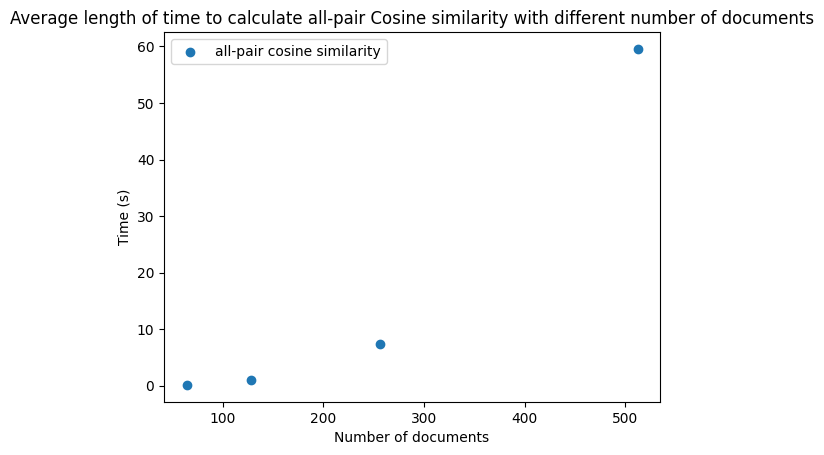

In [46]:
plt.scatter(xs5_cs, ys5_cs, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of documents')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of documents')
plt.show()

Applying the $\log$ method in question 3, we can estimate the exponential and constant of the function.

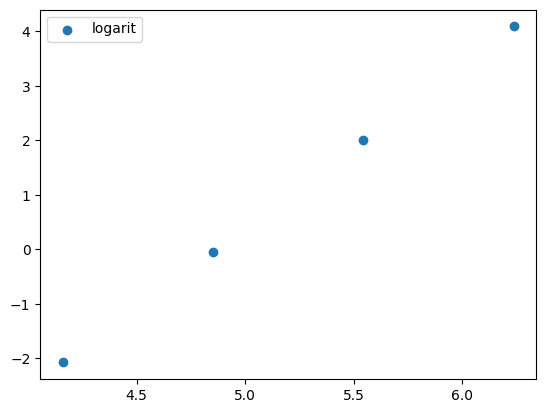

In [47]:
logxs5_cs = [np.log(x) for x in xs5_cs]
logys5_cs = [np.log(y) for y in ys5_cs]

plt.scatter(logxs5_cs, logys5_cs, label="logarit")
plt.legend(loc='best')
plt.show()

In [48]:
res5_cs = linregress(logxs5_cs, logys5_cs)
res5_cs

LinregressResult(slope=2.9636651840001393, intercept=-14.416611988227846, rvalue=0.9999769299614681, pvalue=2.3070038531858295e-05, stderr=0.014235109516264374, intercept_stderr=0.07482042935959152)

The result give us:
- exponential: $\alpha \approx 2.964$
- constant: $c \approx 10^{-14.417}$

Now, we conduct the test with Strassen multiplication approach `sim_matrix_strassen`.

In [49]:
xs5_strassen = []
ys5_strassen = []
zs5_strassen = []

for n in range(6,10):
    df_test = df2[:2**n,:2**n]
    
    xs5_strassen.append(2**n)
    mean,stdev,ans = timeit(sim_matrix_strassen,df_test,repeats=5)
    ys5_strassen.append(mean)
    zs5_strassen.append(ans)

In [50]:
docs = [f"doc{i+1}" for i in range(np.shape(zs5_strassen[0])[0])]

s_strassen = pd.DataFrame(zs5_strassen[0],index=docs,columns=docs).iloc[:10,:10]
display(s_strassen.style.map(lambda v: 'color:red;' if v==1 else ''))

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10
doc1,1.000000,0.700910,0.647195,0.687883,0.626604,0.655422,0.648811,0.636240,0.662542,0.690193
doc2,0.700910,1.000000,0.733707,0.746054,0.684850,0.708562,0.745484,0.738353,0.639135,0.652891
doc3,0.647195,0.733707,1.000000,0.749188,0.681624,0.679839,0.621902,0.663024,0.723504,0.691952
doc4,0.687883,0.746054,0.749188,1.000000,0.702740,0.712269,0.639958,0.702645,0.689917,0.668329
doc5,0.626604,0.684850,0.681624,0.702740,1.000000,0.721749,0.713311,0.788630,0.665651,0.767859
doc6,0.655422,0.708562,0.679839,0.712269,0.721749,1.000000,0.770004,0.760247,0.772522,0.720700
doc7,0.648811,0.745484,0.621902,0.639958,0.713311,0.770004,1.000000,0.678261,0.672894,0.637281
doc8,0.636240,0.738353,0.663024,0.702645,0.788630,0.760247,0.678261,1.000000,0.661237,0.710766
doc9,0.662542,0.639135,0.723504,0.689917,0.665651,0.772522,0.672894,0.661237,1.000000,0.648050
doc10,0.690193,0.652891,0.691952,0.668329,0.767859,0.720700,0.637281,0.710766,0.648050,1.000000


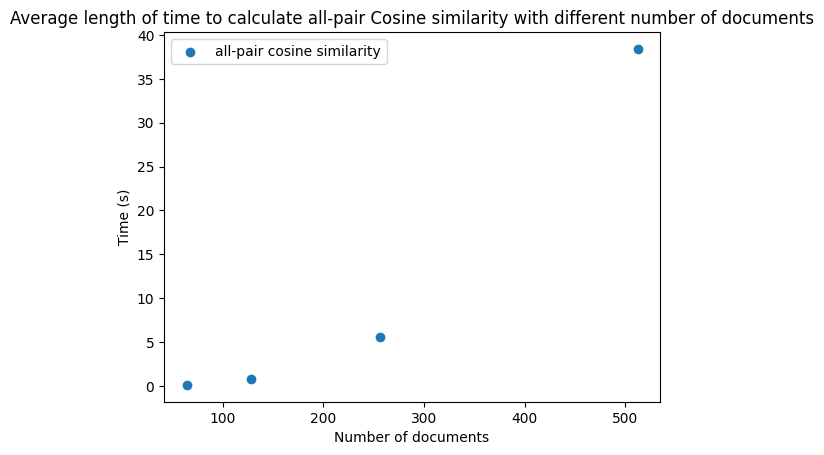

In [51]:
plt.scatter(xs5_strassen, ys5_strassen, label='all-pair cosine similarity')
plt.legend(loc='upper left')
plt.xlabel('Number of documents')
plt.ylabel('Time (s)')
plt.title('Average length of time to calculate all-pair Cosine similarity with different number of documents')
plt.show()

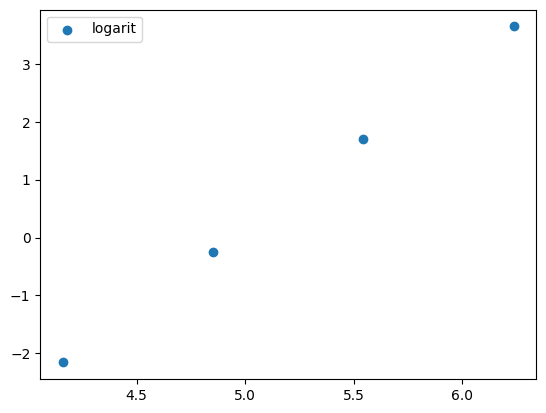

In [52]:
logxs5_strassen = [np.log(x) for x in xs5_strassen]
logys5_strassen = [np.log(y) for y in ys5_strassen]

plt.scatter(logxs5_strassen, logys5_strassen, label="logarit")
plt.legend(loc='best')
plt.show()

In [53]:
res5_strassen = linregress(logxs5_strassen, logys5_strassen)
res5_strassen

LinregressResult(slope=2.7975369288038863, intercept=-13.807329628377005, rvalue=0.9999826183056413, pvalue=1.7381694358720175e-05, stderr=0.011663463759201053, intercept_stderr=0.061303733932386764)

As we can see, the both methods return the same similarity matrix. It is noticed that we got significant improvement in run-time when using Strassen method.

The exponential in the Strassen approach is also less than that of standard method:
- exponential: $\alpha \approx 2.798$
- constant: $c \approx 10^{-13.807}$

The results from this empirical test are closed with the theoretical running times - $O(n^3)$ for standard approach and $O(n^{}2.807)$ for Strassen approach.

$\rarr$ With a sufficiently large and appropriate matrix ($2^n$ square matrix), we can use Strassen method to achieve a better run-time than $O(m^2n)$, where $n$ is the numbers of shingles and $m$ is the number of documents.